# **Empirische Wirtschaftsforschung**

# Simulationsstudie zu Asymptotischen Eigenschaften

**Author:** [Anthony Strittmatter](http://www.anthonystrittmatter.com)

Wir führen eine Simulationsstudie durch um zu untersuchen wie sich Schätzer verhalten wenn wir die Stichprobengrösse $N$ erhöhen. Wir generieren eine zufällige binäre Variable $Y \in \{0,1\}$ und Erwartungswert $\mu = E[Y_i] = Pr(Y_i =1) = 0.25$. Wir replizieren diesen Daten Generierungs Prozess (DGP) 2,000 mal, damit unsere Ergebnisse möglichst representativ für unterschiedliche zufällige Realisierungen von $Y_i$ sind. Ein Vorteil der Simulationsstudie ist, dass wir den wahren Erwartungswert von $Y_i$ kennen. Deswegen können wir die durchschnittliche Verzerrung über die 2,000 Replikationen berechnen.

## Definition der Inputfaktoren

In [3]:
############## Definition der Inputfaktoren ##############

N1 <- 20 # Stichprobengrösse 1
N2 <- 1000 # Stichprobengrösse 2
rep <- 2000 # Anzahl replikationen

print('Input factors defined.')

##########################################################

[1] "Input factors defined."


## Daten Generierungs Prozess (DGP)

In [4]:
############## Daten Generierungs Prozess (DGP) ##############
set.seed(123456789)

# Wir generieren eine Nx2000 Matrix mit Dummies
Y1 <- matrix(floor(runif(rep*N1 ,min = 0.25, max = 1.25)), nrow = N1, ncol = rep)
# Zeilen sind unterschiedliche Beobachtungen
# Spalten sind die jeweiligen Replikationen des DGPs
# Beispiel: Y könnte ein Dummy für Frauen sein

# Wir machen das gleiche für die zweite Stichprobengrösse
Y2 <- matrix(floor(runif(rep*N2 ,min = 0.25, max = 1.25)), nrow = N2, ncol = rep)

print('Data is generated.')

###############################################################

[1] "Data is generated."


## Durchführung der unterschiedlichen Schätzungen

Wir untersuchen die Schätzer:


\begin{align}
\bar{Y}_A &= \frac{1}{N} \sum_{i=1}^{N} Y_i, \\
\bar{Y}_B &= \frac{1}{3} ( Y_1 + Y_2 + Y_3), \\
\bar{Y}_C &= \frac{1}{N-1} \sum_{i=1}^{N} Y_i, \\
\bar{Y}_D &= \frac{1}{\sqrt{N}} \sum_{i=1}^{N} Y_i .
\end{align}

Zusätzlich schauen wir uns noch an:

\begin{align}
\bar{Y}_D^* &= \frac{1}{\sqrt{N}} \sum_{i=1}^{N} (Y_i - \mu).
\end{align}

In [5]:
############## Estimation of Sample Mean ##############

# Generate vector to store the results
shares <- matrix(NA, nrow = rep, ncol = 10)

# Make a loop
for (i in c(1:rep)) {
    # N = 20
    shares[i,1] <- mean(Y1[,i]) # calculate mean for each replication
    shares[i,2] <- 1/3*(Y1[1,i] + Y1[2,i] + Y1[3,i])
    shares[i,3] <- N1/(N1-1)*mean(Y1[,i])
    shares[i,4] <- sqrt(N1)*mean(Y1[,i])
    shares[i,5] <- sqrt(N1)*mean(Y1[,i] - 0.25)
    
    # N = 1000
    shares[i,6] <- mean(Y2[,i]) # calculate mean for each replication
    shares[i,7] <- 1/3*(Y2[1,i] + Y2[2,i] + Y2[3,i])
    shares[i,8] <- N2/(N2-1)*mean(Y2[,i])
    shares[i,9] <- sqrt(N2)*mean(Y2[,i])
    shares[i,10] <- sqrt(N2)*mean(Y2[,i] - 0.25)
}

print('Means are estimated')

########################################################

[1] "Means are estimated"


## Illustration Gesetz der Grossen Zahlen

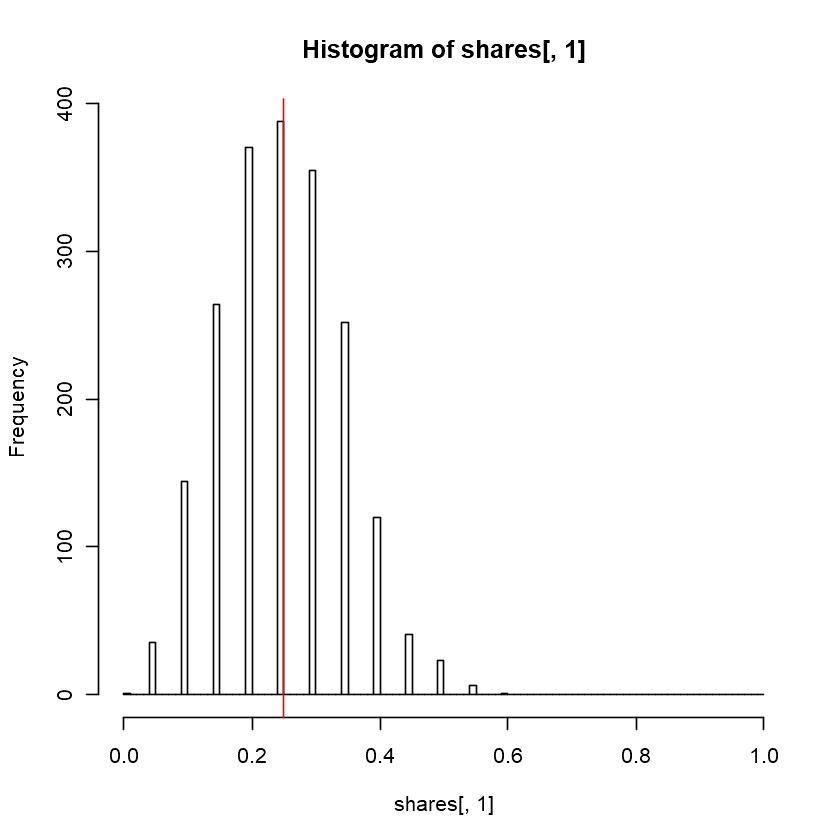

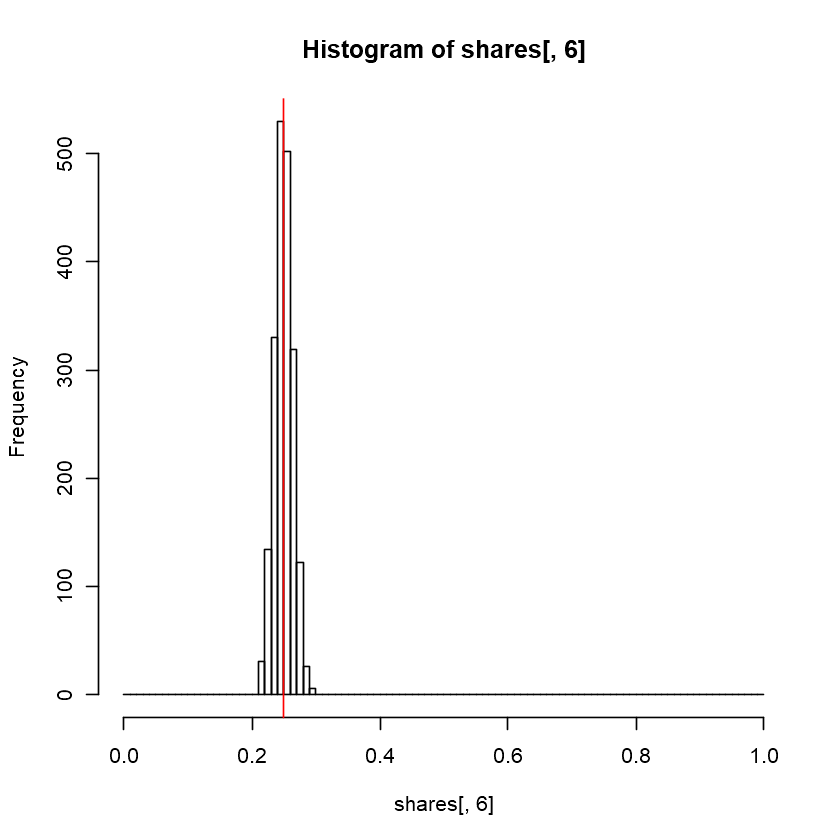

In [6]:
############## Gesetz der Grossen Zahlen ##############

# Histogram
# Estimator 1
hist(shares[,1], breaks = seq(0,1,by=0.01))
abline(v=.25,col="red")

hist(shares[,6], breaks = seq(0,1,by=0.01))
abline(v=.25,col="red")

########################################################

# Ergebnisse für die anderen Schätzer

In [7]:
############## Performance Measures ##############

results <- matrix(NA,nrow = 4 , ncol = 4)
colnames(results) <- c("Estimator 1", "Estimator 2", "Estimator 3", "Estimator 4")
rownames(results) <- c("Mean Bias N1", "Mean Bias N2", "Std. Dev. N1", "Std. Dev. N2")

# Mean Bias
# N = 20
results[1,1] <- round(mean(shares[,1] -.25), digits=4)
results[1,2] <- round(mean(shares[,2] -.25), digits=4)
results[1,3] <- round(mean(shares[,3] -.25), digits=4)
results[1,4] <- round(mean(shares[,4] -.25), digits=4)

# N = 1000
results[2,1] <- round(mean(shares[,6] -.25), digits=4)
results[2,2] <- round(mean(shares[,7] -.25), digits=4)
results[2,3] <- round(mean(shares[,8] -.25), digits=4)
results[2,4] <- round(mean(shares[,9] -.25), digits=4)



# Standard Deviation
# N = 20
results[3,1] <- round(sd(shares[,1]), digits=4)
results[3,2] <- round(sd(shares[,2]), digits=4)
results[3,3] <- round(sd(shares[,3]), digits=4)
results[3,4] <- round(sd(shares[,4]), digits=4)

# N = 1000
results[4,1] <- round(sd(shares[,6]), digits=4)
results[4,2] <- round(sd(shares[,7]), digits=4)
results[4,3] <- round(sd(shares[,8]), digits=4)
results[4,4] <- round(sd(shares[,9]), digits=4)


print(results)

##################################################

             Estimator 1 Estimator 2 Estimator 3 Estimator 4
Mean Bias N1      0.0016     -0.0008      0.0149      0.8754
Mean Bias N2      0.0002     -0.0053      0.0005      7.6622
Std. Dev. N1      0.0952      0.2483      0.1002      0.4257
Std. Dev. N2      0.0141      0.2538      0.0141      0.4460


# Illustration Zentraler Grenzwertsatz

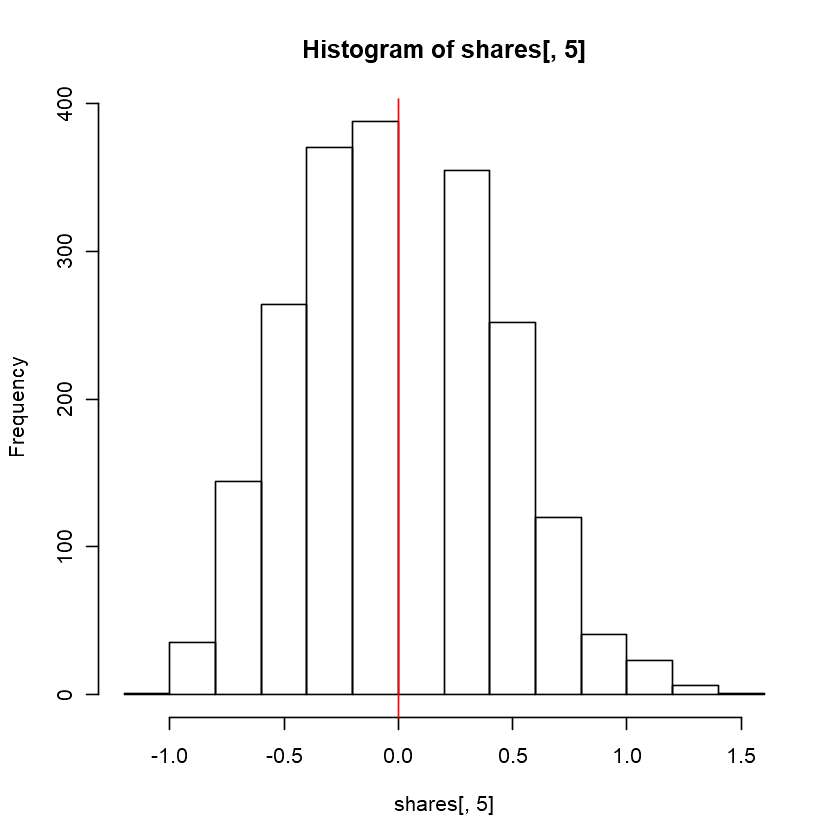

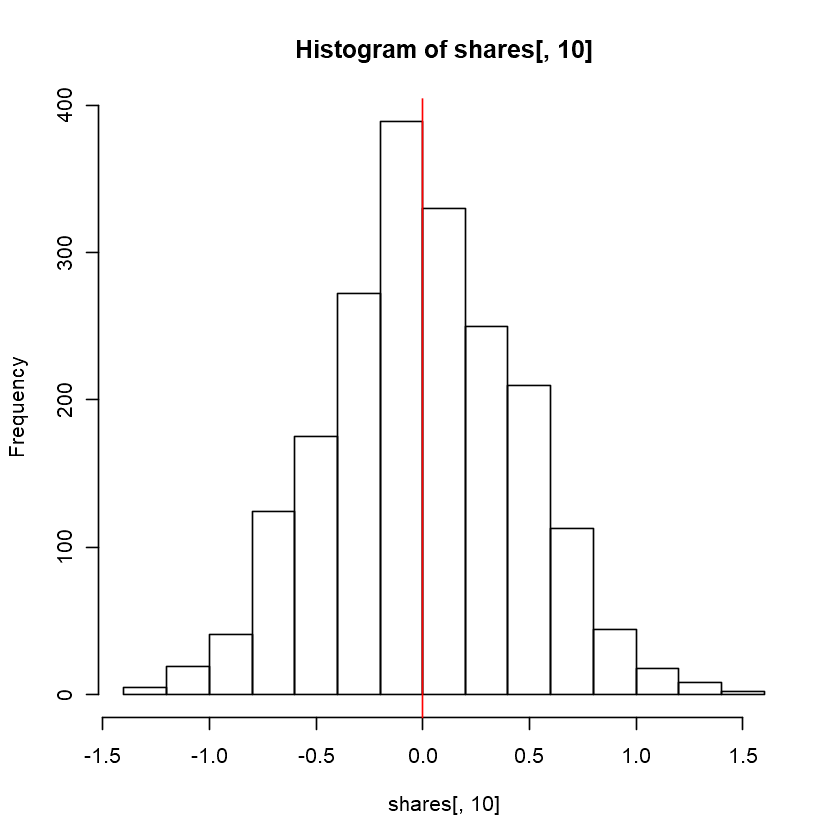

In [8]:
############## Zentraler Grenzwertsatz ##############

# Estimator 5
hist(shares[,5])
abline(v=0,col="red")

# Estimator 5
hist(shares[,10])
abline(v=0,col="red")

######################################################